In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/sarahbismuth/m5DATA/master/M5_Data.csv")

In [3]:
df

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491
5,1,100,74,12,46,19.5,0.149,28,0,0,0.055155
6,9,89,62,0,0,22.5,0.142,33,0,0,0.107115
7,8,120,78,0,0,25.0,0.409,64,0,0,0.459947
8,1,79,60,42,48,43.5,0.678,23,0,0,0.117024
9,2,123,48,32,165,42.1,0.520,26,0,0,0.315363


In [4]:
#question 3
CM=pd.crosstab(df["class"],df["scored.class"],margins=True,rownames=['actual'],colnames=['predicted'])
CM

predicted,0,1,All
actual,,,
0,119,5,124
1,30,27,57
All,149,32,181


In [5]:
df["class"].value_counts()

0    124
1     57
Name: class, dtype: int64

In [6]:
df["scored.class"].value_counts()

0    149
1     32
Name: scored.class, dtype: int64

In this crosstab the predicted variable is the scored class and the actual variable is the class column 

In [7]:
#question 4
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
TP=CM.iloc[1,1]
FN=CM.iloc[1,0]

In [8]:
#question 5 
def my_accuracy(actual_values,predicted_values):
    cm=pd.crosstab(actual_values,predicted_values,margins=True)
    #the numerator corresponds to the true negatives values and the True positives values 
    num_correct=cm.iloc[0,0]+cm.iloc[1,1]
    total=cm.iloc[2,2]
    return(num_correct/total)


In [9]:
#question 6
def my_precision(actual_values,predicted_values):
    cm=pd.crosstab(actual_values,predicted_values,margins=True)
    #the numerator is the true positive values 
    numerator=cm.iloc[1,1]
    #The denominator is the sum of the false positive values and the true positive values 
    denominator=cm.iloc[0,1]+cm.iloc[1,1]
    return(numerator/denominator)

In [10]:
#question7
def my_sensitivity(actual_values,predicted_values):
    cm=pd.crosstab(actual_values,predicted_values,margins=True)
    num=cm.iloc[1,1]
    denom=cm.iloc[1,0]+cm.iloc[1,1]
    return(num/denom)

In [11]:
#question 8
def my_specificity(actual_values,predicted_values):
    cm=pd.crosstab(actual_values,predicted_values,margins=True)
    nums=cm.iloc[0,0]
    denoms=cm.iloc[0,0]+cm.iloc[0,1]
    return(nums/denoms)

In [12]:
#question 9
def my_f1_score(actual_values,predicted_values):
    numer=2*my_precision(actual_values,predicted_values)*my_sensitivity(actual_values,predicted_values)
    denome=my_precision(actual_values,predicted_values)+my_sensitivity(actual_values,predicted_values)
    return(numer/denome)

In [13]:
#Question 10 
import matplotlib.pyplot as plt
import numpy as np 

def my_ROC_AUC(actual_values,predicted_values,scored_probabilities):
    threshold=np.arange(0,1,0.05)
    tpr=[]
    fpr=[]
    for i in threshold:
        temp_predict=[1  if j>i else 0 for j in scored_probabilities]
        tpr.append(my_sensitivity(actual_values,pd.Series(temp_predict)))
        fpr.append(1-my_specificity(actual_values,pd.Series(temp_predict)))
    AUC=1/2 -(1-my_specificity(actual_values,predicted_values))/2 + (my_sensitivity(actual_values,predicted_values))/2
       
    plt.plot(fpr,tpr,color="pink",label='ROC')  
    plt.plot([0,1],[0,1],color='green',linestyle='--')
    plt.title(f'ROC curve (AUC={AUC})')
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.legend()
    
    

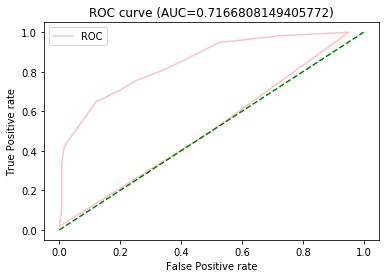

In [14]:

my_ROC_AUC(df["class"],df["scored.class"],df['scored.probability'])


In [15]:
#question 11
my_accuracy(df["class"],df["scored.class"])


0.8066298342541437

In [16]:
my_precision(df["class"],df["scored.class"])

0.84375

In [17]:
my_sensitivity(df["class"],df["scored.class"])

0.47368421052631576

In [18]:
my_specificity(df["class"],df["scored.class"])

0.9596774193548387

In [19]:
my_f1_score(df["class"],df["scored.class"])

0.6067415730337079

In [20]:
#question 12 
from sklearn import metrics
metrics.accuracy_score(df["class"],df["scored.class"])

0.8066298342541437

In [21]:
metrics.precision_score(df["class"],df["scored.class"])

0.84375

In [22]:
metrics.recall_score(df["class"],df["scored.class"])

0.47368421052631576

In [23]:
metrics.classification_report(df["class"],df["scored.class"])

'              precision    recall  f1-score   support\n\n           0       0.80      0.96      0.87       124\n           1       0.84      0.47      0.61        57\n\n    accuracy                           0.81       181\n   macro avg       0.82      0.72      0.74       181\nweighted avg       0.81      0.81      0.79       181\n'

In [24]:
metrics.f1_score(df["class"],df["scored.class"])

0.6067415730337079

In [25]:
metrics.confusion_matrix(df["class"],df["scored.class"])

array([[119,   5],
       [ 30,  27]])

We can see that the results that we have with the function that i have created and  pre-built functions are really similar. This similarity shows that the results of my own functionss work well. 

In [26]:
#question 13
metrics.roc_curve (df["class"],df["scored.class"])

(array([0.        , 0.04032258, 1.        ]),
 array([0.        , 0.47368421, 1.        ]),
 array([2, 1, 0]))

In [27]:
fpr, tpr, threshold = metrics.roc_curve(df['class'], df['scored.class'])

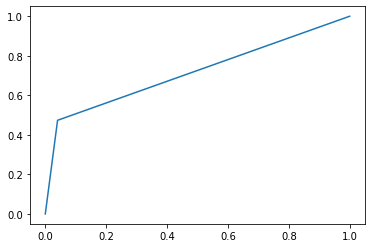

In [28]:
plt.plot(fpr, tpr)


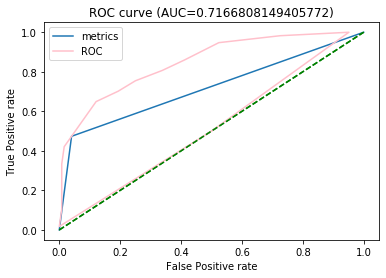

In [29]:

fpr, tpr, threshold = metrics.roc_curve(df['class'], df['scored.class'])
plt.plot(fpr, tpr,label='metrics')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.title(f'ROC curve (AUC={metrics.auc(fpr,tpr)})')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()
my_ROC_AUC(df["class"],df["scored.class"],df['scored.probability'])


the builted metrics function only uses 3 threshold points.
MY Curve is smoother because it using more threshold points. 

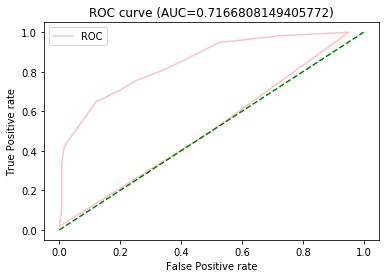

In [30]:
my_ROC_AUC(df["class"],df["scored.class"],df['scored.probability'])